In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [31]:
df = pd.read_csv('data/weather_data.csv',
                parse_dates=['day'])

In [6]:
df.head()

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          9 non-null      datetime64[ns]
 1   temperature  5 non-null      float64       
 2   windspeed    5 non-null      float64       
 3   event        7 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 416.0+ bytes


In [32]:
df.set_index('day', inplace=True)

In [9]:
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [14]:
pd.set_option('display.precision', 2)

In [15]:
df.interpolate()

,temperature,windspeed,event
day,,,
2017-01-01,32.00,6.00,Rain
2017-01-04,30.00,9.00,Sunny
2017-01-05,28.00,8.00,Snow
2017-01-06,30.00,7.00,NaN
2017-01-07,32.00,7.25,Rain
2017-01-08,32.67,7.50,Sunny
2017-01-09,33.33,7.75,NaN
2017-01-10,34.00,8.00,Cloudy
2017-01-11,40.00,12.00,Sunny


In [33]:
df = df.interpolate(method='time')
df

,temperature,windspeed,event
day,,,
2017-01-01,32.00,6.00,Rain
2017-01-04,29.00,9.00,Sunny
2017-01-05,28.00,8.00,Snow
2017-01-06,30.00,7.00,NaN
2017-01-07,32.00,7.25,Rain
2017-01-08,32.67,7.50,Sunny
2017-01-09,33.33,7.75,NaN
2017-01-10,34.00,8.00,Cloudy
2017-01-11,40.00,12.00,Sunny


In [25]:
df[df['event'] == 'Sunny'].median()

temperature    32.67
windspeed       9.00
dtype: float64

In [24]:
df[['event', 'temperature', 'windspeed']].groupby('event').median()

,temperature,windspeed
event,,
Cloudy,34.00,8.00
Rain,32.00,6.62
Snow,28.00,8.00
Sunny,32.67,9.00


In [34]:
df['event'] = df['event'].astype('category')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2017-01-01 to 2017-01-11
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   temperature  9 non-null      float64 
 1   windspeed    9 non-null      float64 
 2   event        7 non-null      category
dtypes: category(1), float64(2)
memory usage: 417.0 bytes


In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/7_group_by/weather_by_cities.csv')

In [37]:
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          12 non-null     object
 1   city         12 non-null     object
 2   temperature  12 non-null     int64 
 3   windspeed    12 non-null     int64 
 4   event        12 non-null     object
dtypes: int64(2), object(3)
memory usage: 608.0+ bytes


In [39]:
df = df.astype(dtype={'day':'datetime64', 'temperature':'uint8',
                      'windspeed':'uint8',
                     'event':'category'})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          12 non-null     datetime64[ns]
 1   city         12 non-null     object        
 2   temperature  12 non-null     uint8         
 3   windspeed    12 non-null     uint8         
 4   event        12 non-null     category      
dtypes: category(1), datetime64[ns](1), object(1), uint8(2)
memory usage: 556.0+ bytes


In [42]:
df.set_index('day', inplace=True)
df

,city,temperature,windspeed,event
day,,,,
2017-01-01,new york,32,6,Rain
2017-01-02,new york,36,7,Sunny
2017-01-03,new york,28,12,Snow
2017-01-04,new york,33,7,Sunny
2017-01-01,mumbai,90,5,Sunny
2017-01-02,mumbai,85,12,Fog
2017-01-03,mumbai,87,15,Fog
2017-01-04,mumbai,92,5,Rain
2017-01-01,paris,45,20,Sunny


In [43]:
g = df.groupby('city')
g

In [48]:
for city, city_df in g:
    print(f'{city}\n{city_df}\n\n')

mumbai
              city  temperature  windspeed  event
day                                              
2017-01-01  mumbai           90          5  Sunny
2017-01-02  mumbai           85         12    Fog
2017-01-03  mumbai           87         15    Fog
2017-01-04  mumbai           92          5   Rain


new york
                city  temperature  windspeed  event
day                                                
2017-01-01  new york           32          6   Rain
2017-01-02  new york           36          7  Sunny
2017-01-03  new york           28         12   Snow
2017-01-04  new york           33          7  Sunny


paris
             city  temperature  windspeed   event
day                                              
2017-01-01  paris           45         20   Sunny
2017-01-02  paris           50         13  Cloudy
2017-01-03  paris           54          8  Cloudy
2017-01-04  paris           42         10  Cloudy




In [51]:
g.agg(['mean', 'median', 'std'])

temperature              windspeed             
                mean median   std      mean median   std
city                                                    
mumbai         88.50   88.5  3.11      9.25    8.5  5.06
new york       32.25   32.5  3.30      8.00    7.0  2.71
paris          47.75   47.5  5.32     12.75   11.5  5.25

In [60]:
df.reset_index(inplace=True)

In [61]:
df.pivot(index='city', columns='day')

temperature                                   windspeed             \
day       2017-01-01 2017-01-02 2017-01-03 2017-01-04 2017-01-01 2017-01-02   
city                                                                          
mumbai            90         85         87         92          5         12   
new york          32         36         28         33          6          7   
paris             45         50         54         42         20         13   

                                    event                                   
day      2017-01-03 2017-01-04 2017-01-01 2017-01-02 2017-01-03 2017-01-04  
city                                                                        
mumbai           15          5      Sunny        Fog        Fog       Rain  
new york         12          7       Rain      Sunny       Snow      Sunny  
paris             8         10      Sunny     Cloudy     Cloudy     Cloudy

In [62]:
df.pivot(index='city', columns='day', values='windspeed')

day,2017-01-01,2017-01-02,2017-01-03,2017-01-04
city,,,,
mumbai,5,12,15,5
new york,6,7,12,7
paris,20,13,8,10


In [63]:
df.pivot(index='day',columns='city')

temperature                windspeed                 event  \
city            mumbai new york paris    mumbai new york paris mumbai   
day                                                                     
2017-01-01          90       32    45         5        6    20  Sunny   
2017-01-02          85       36    50        12        7    13    Fog   
2017-01-03          87       28    54        15       12     8    Fog   
2017-01-04          92       33    42         5        7    10   Rain   

                             
city       new york   paris  
day                          
2017-01-01     Rain   Sunny  
2017-01-02    Sunny  Cloudy  
2017-01-03     Snow  Cloudy  
2017-01-04    Sunny  Cloudy

In [64]:
df.pivot(index='temperature',columns='city')

day                       windspeed                 event  \
city            mumbai   new york      paris    mumbai new york paris mumbai   
temperature                                                                    
28                 NaT 2017-01-03        NaT       NaN     12.0   NaN    NaN   
32                 NaT 2017-01-01        NaT       NaN      6.0   NaN    NaN   
33                 NaT 2017-01-04        NaT       NaN      7.0   NaN    NaN   
36                 NaT 2017-01-02        NaT       NaN      7.0   NaN    NaN   
42                 NaT        NaT 2017-01-04       NaN      NaN  10.0    NaN   
45                 NaT        NaT 2017-01-01       NaN      NaN  20.0    NaN   
50                 NaT        NaT 2017-01-02       NaN      NaN  13.0    NaN   
54                 NaT        NaT 2017-01-03       NaN      NaN   8.0    NaN   
85          2017-01-02        NaT        NaT      12.0      NaN   NaN    Fog   
87          2017-01-03        NaT        NaT      15.0      NaN   NaN    Fog   
90          2017-01-01        NaT        NaT       5.0      NaN   NaN  Sunny   
92          2017-01-04        NaT        NaT       5.0      NaN   NaN   Rain   

                              
city        new york   paris  
temperature                   
28              Snow     NaN  
32              Rain     NaN  
33             Sunny     NaN  
36             Sunny     NaN  
42               NaN  Cloudy  
45               NaN   Sunny  
50               NaN  Cloudy  
54               NaN  Cloudy  
85               NaN     NaN  
87               NaN     NaN  
90               NaN     NaN  
92               NaN     NaN

In [65]:
df.pivot_table(index='city', columns='day')

temperature                                   windspeed             \
day       2017-01-01 2017-01-02 2017-01-03 2017-01-04 2017-01-01 2017-01-02   
city                                                                          
mumbai            90         85         87         92          5         12   
new york          32         36         28         33          6          7   
paris             45         50         54         42         20         13   

                                
day      2017-01-03 2017-01-04  
city                            
mumbai           15          5  
new york         12          7  
paris             8         10

In [66]:
df.pivot(index='city', columns='day')

temperature                                   windspeed             \
day       2017-01-01 2017-01-02 2017-01-03 2017-01-04 2017-01-01 2017-01-02   
city                                                                          
mumbai            90         85         87         92          5         12   
new york          32         36         28         33          6          7   
paris             45         50         54         42         20         13   

                                    event                                   
day      2017-01-03 2017-01-04 2017-01-01 2017-01-02 2017-01-03 2017-01-04  
city                                                                        
mumbai           15          5      Sunny        Fog        Fog       Rain  
new york         12          7       Rain      Sunny       Snow      Sunny  
paris             8         10      Sunny     Cloudy     Cloudy     Cloudy

In [70]:
df.pivot_table(index='city', columns='day', aggfunc='median',
               values='windspeed')

day,2017-01-01,2017-01-02,2017-01-03,2017-01-04
city,,,,
mumbai,5,12,15,5
new york,6,7,12,7
paris,20,13,8,10


In [73]:
df.pivot_table(index=pd.Grouper(freq='2D', key='day'),
              columns='city')

temperature                windspeed               
city            mumbai new york paris    mumbai new york paris
day                                                           
2017-01-01        87.5     34.0  47.5       8.5      6.5  16.5
2017-01-03        89.5     30.5  48.0      10.0      9.5   9.0

In [74]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/11_melt/weather.csv')

In [75]:
df

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


In [77]:
df1 = pd.melt(df, id_vars=['day'])
df1

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [79]:
df1.pivot(index='day', columns='variable', values='value')

variable,berlin,chennai,chicago
day,,,
Friday,30,83,30
Monday,41,75,32
Saturday,45,81,20
Sunday,47,77,25
Thursday,38,82,22
Tuesday,43,77,30
Wednesday,45,75,28


In [80]:
df1

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [81]:
df1.loc[df1['variable'] == 'chicago']

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25


In [84]:
df1.rename({'variable':'city', 'value':'temp'}, inplace=True)

In [85]:
df1

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [87]:
df = pd.read_excel('https://github.com/codebasics/py/blob/master/pandas/12_stack/stocks.xlsx?raw=true',
                      header=[0, 1])
df

Unnamed: 0_level_0    Price                  Price to earnings ratio (P/E)  \
             Company Facebook Google Microsoft                      Facebook   
0         2017-06-05      155    955        66                         37.10   
1         2017-06-06      150    987        69                         36.98   
2         2017-06-07      153    963        62                         36.78   
3         2017-06-08      155   1000        61                         36.11   
4         2017-06-09      156   1012        66                         37.07   

                    
  Google Microsoft  
0   32.0     30.31  
1   31.3     30.56  
2   31.7     30.46  
3   31.2     30.11  
4   30.0     31.00

In [88]:
df.stack()

Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

In [90]:
df.stack(level=0, dropna=True)

Company  Facebook  Google  Microsoft
0 Price                                NaT    155.00   955.0      66.00
  Price to earnings ratio (P/E)        NaT     37.10    32.0      30.31
  Unnamed: 0_level_0            2017-06-05       NaN     NaN        NaN
1 Price                                NaT    150.00   987.0      69.00
  Price to earnings ratio (P/E)        NaT     36.98    31.3      30.56
  Unnamed: 0_level_0            2017-06-06       NaN     NaN        NaN
2 Price                                NaT    153.00   963.0      62.00
  Price to earnings ratio (P/E)        NaT     36.78    31.7      30.46
  Unnamed: 0_level_0            2017-06-07       NaN     NaN        NaN
3 Price                                NaT    155.00  1000.0      61.00
  Price to earnings ratio (P/E)        NaT     36.11    31.2      30.11
  Unnamed: 0_level_0            2017-06-08       NaN     NaN        NaN
4 Price                                NaT    156.00  1012.0      66.00
  Price to earnings ratio (P/E)        NaT     37.07    30.0      31.00
  Unnamed: 0_level_0            2017-06-09       NaN     NaN        NaN

In [91]:
df.stack(level=0, dropna=True).unstack()

Company                                                  Facebook  \
    Price Price to earnings ratio (P/E) Unnamed: 0_level_0    Price   
0     NaT                           NaT         2017-06-05    155.0   
1     NaT                           NaT         2017-06-06    150.0   
2     NaT                           NaT         2017-06-07    153.0   
3     NaT                           NaT         2017-06-08    155.0   
4     NaT                           NaT         2017-06-09    156.0   

                                                    Google  \
  Price to earnings ratio (P/E) Unnamed: 0_level_0   Price   
0                         37.10                NaN   955.0   
1                         36.98                NaN   987.0   
2                         36.78                NaN   963.0   
3                         36.11                NaN  1000.0   
4                         37.07                NaN  1012.0   

                                                   Microsoft  \
  Price to earnings ratio (P/E) Unnamed: 0_level_0     Price   
0                          32.0                NaN      66.0   
1                          31.3                NaN      69.0   
2                          31.7                NaN      62.0   
3                          31.2                NaN      61.0   
4                          30.0                NaN      66.0   

                                                    
  Price to earnings ratio (P/E) Unnamed: 0_level_0  
0                         30.31                NaN  
1                         30.56                NaN  
2                         30.46                NaN  
3                         30.11                NaN  
4                         31.00                NaN

In [93]:
df = pd.read_excel('https://github.com/codebasics/py/blob/master/pandas/13_crosstab/survey.xls?raw=true')

In [94]:
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [95]:
pd.crosstab(df['Nationality'], df['Handedness'])

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


In [97]:
pd.crosstab(df['Sex'], df['Handedness'])

Handedness,Left,Right
Sex,,
Female,2,3
Male,5,2


In [98]:
pd.crosstab(df['Sex'], df['Handedness'], margins=True)

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


In [99]:
pd.crosstab(df['Nationality'], [df['Handedness'], df['Sex']])

Handedness    Left       Right     
Sex         Female Male Female Male
Nationality                        
Bangadesh        1    1      0    0
China            1    1      1    0
India            0    2      0    1
USA              0    1      2    1

In [100]:
pd.crosstab(df['Sex'], df['Handedness'],normalize=True, margins=True)

Handedness,Left,Right,All
Sex,,,
Female,0.17,0.25,0.42
Male,0.42,0.17,0.58
All,0.58,0.42,1.00


In [101]:
pd.crosstab(df['Sex'], df['Handedness'],normalize='index', margins=True)

Handedness,Left,Right
Sex,,
Female,0.40,0.60
Male,0.71,0.29
All,0.58,0.42


In [132]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/14_ts_datetimeindex/aapl.csv',
                parse_dates=['Date'])

df.set_index('Date', inplace=True)

In [133]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107
...,...,...,...,...,...
2016-07-15,98.92,99.30,98.50,98.78,30136990
2016-07-14,97.39,98.99,97.32,98.79,38918997
2016-07-13,97.41,97.67,96.84,96.87,25892171


In [125]:
df.index.min()

Timestamp('2016-07-11 00:00:00')

In [126]:
df.index.max()

Timestamp('2017-07-07 00:00:00')

In [129]:
df.loc[(df.index >= '2016-08-01') & (df.index < '2017-01-01')]

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-30,116.65,117.20,115.43,115.82,30586265
2016-12-29,116.45,117.11,116.40,116.73,15039519
2016-12-28,117.52,118.02,116.20,116.76,20905892
2016-12-27,116.52,117.80,116.49,117.26,18296855
2016-12-23,115.59,116.52,115.59,116.52,14249484
...,...,...,...,...,...
2016-08-05,106.27,107.65,106.18,107.48,40553402
2016-08-04,105.58,106.00,105.28,105.87,27408650
2016-08-03,104.81,105.84,104.77,105.79,30202641


In [130]:
df.loc[(df.index >= '2016-08-01') & (df.index < '2017-01-01')].describe()

,Open,High,Low,Close,Volume
count,107.00,107.00,107.00,107.00,1.07e+02
mean,111.52,112.39,110.78,111.67,3.38e+07
std,3.88,3.79,3.90,3.80,1.51e+07
min,102.65,105.72,102.53,103.13,1.15e+07
25%,108.53,109.02,107.81,108.47,2.54e+07
50%,111.40,112.35,110.53,111.59,2.88e+07
75%,114.72,115.89,113.78,115.06,3.63e+07
max,118.18,118.69,117.45,118.25,1.12e+08


In [138]:
df.loc["2016-10-01"]

,Open,High,Low,Close,Volume
Date,,,,,


In [140]:
df['Close'].resample('W').mean()

Date
2016-07-17     97.77
2016-07-24     99.55
2016-07-31    101.10
2016-08-07    105.93
2016-08-14    108.26
2016-08-21    109.30
2016-08-28    107.98
2016-09-04    106.68
2016-09-11    106.18
2016-09-18    111.13
2016-09-25    113.61
2016-10-02    113.03
2016-10-09    113.30
2016-10-16    116.86
2016-10-23    117.16
2016-10-30    115.94
2016-11-06    111.06
2016-11-13    109.71
2016-11-20    108.56
2016-11-27    111.64
2016-12-04    110.59
2016-12-11    111.23
2016-12-18    115.09
2016-12-25    116.69
2017-01-01    116.64
2017-01-08    116.67
2017-01-15    119.23
2017-01-22    119.94
2017-01-29    121.16
2017-02-05    125.87
2017-02-12    131.68
2017-02-19    134.98
2017-02-26    136.75
2017-03-05    138.49
2017-03-12    139.14
2017-03-19    139.87
2017-03-26    140.86
2017-04-02    143.28
2017-04-09    143.90
2017-04-16    141.91
2017-04-23    141.68
2017-04-30    143.86
2017-05-07    147.33
2017-05-14    154.06
2017-05-21    153.40
2017-05-28    153.72
2017-06-04    153.76
2017-06-

<AxesSubplot:xlabel='Date'>

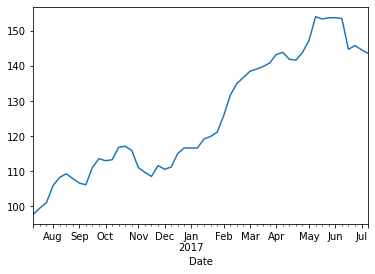

In [141]:
%matplotlib inline
df['Close'].resample('W').mean().plot()

<AxesSubplot:xlabel='Date'>

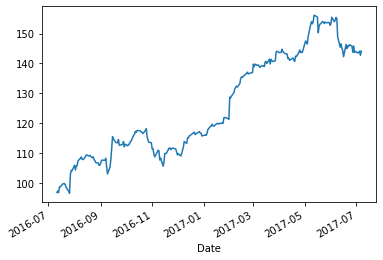

In [142]:
df['Close'].plot()